In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data=pd.read_csv("heart.csv")

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<ol>
    <li>Age: age of the patient [years]</li>
    <li>Sex: sex of the patient [M: Male, F: Female]</li>
    <li>ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</li>
    <li>RestingBP: resting blood pressure [mm Hg]</li>
    <li>Cholesterol: serum cholesterol [mm/dl]</li>
    <li>FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</li>
    <li>RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</li>
    <li>MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]</li>
    <li>ExerciseAngina: exercise-induced angina [Y: Yes, N: No]</li>
    <li>Oldpeak: oldpeak = ST [Numeric value measured in depression]</li>
    <li>ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</li>
    <li>HeartDisease: output class [1: heart disease, 0: Normal]</li>
</ol>

<AxesSubplot:>

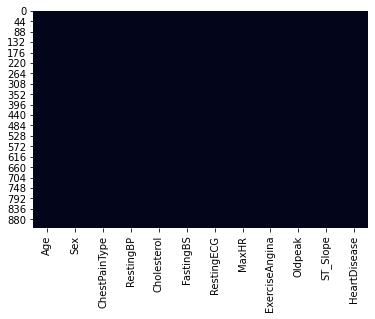

In [4]:
sns.heatmap(data.isna(),cbar=False)

([<matplotlib.patches.Wedge at 0x2ab90df3eb0>,
 [Text(-0.1835941114214546, 1.0845705151124876, '1'),
  Text(0.1835941114214547, -1.0845705151124876, '0')],
 [Text(-0.10014224259352068, 0.5915839173340841, '55.3%'),
  Text(0.10014224259352074, -0.5915839173340841, '44.7%')])

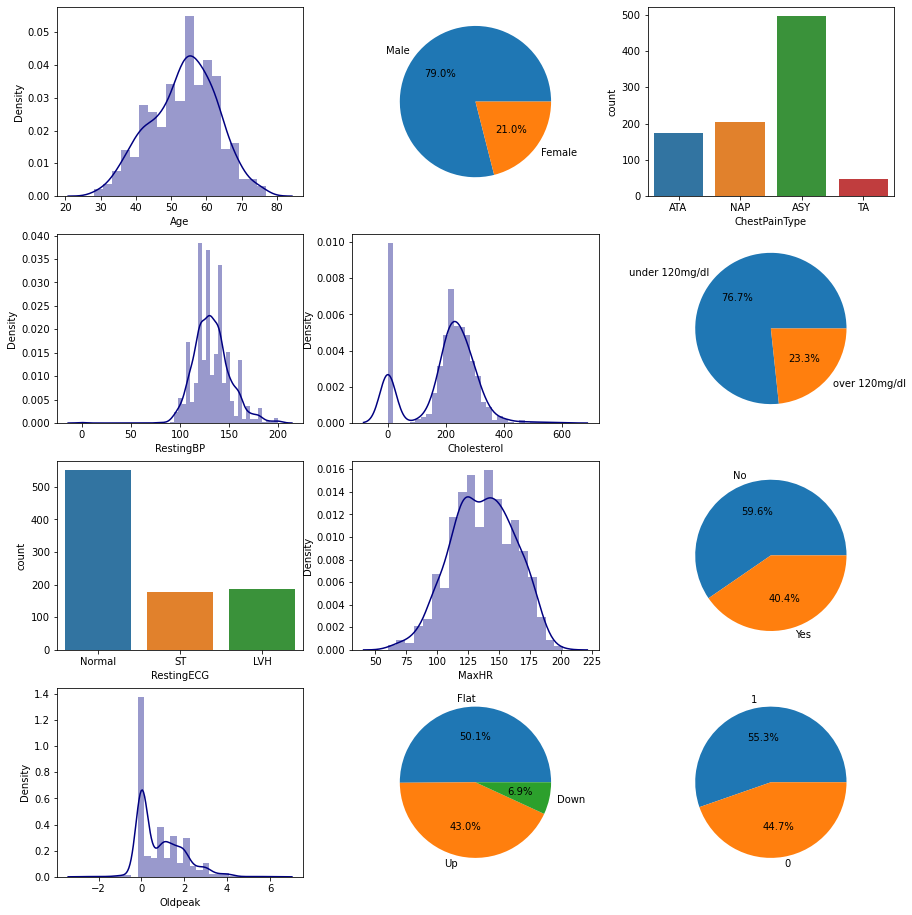

In [55]:
plt.figure(figsize=(15,16))
plt.subplot(4,3,1)
sns.distplot(data['Age'],color='navy')
plt.subplot(4,3,2)
plt.pie(data['Sex'].value_counts(),labels=['Male','Female'],autopct="%.1f%%")
plt.subplot(4,3,3)
sns.countplot(data['ChestPainType'])
plt.subplot(4,3,4)
sns.distplot(data['RestingBP'],color='navy')
plt.subplot(4,3,5)
sns.distplot(data['Cholesterol'],color='navy')
plt.subplot(4,3,6)
plt.pie(data['FastingBS'].value_counts(),labels=['under 120mg/dl','over 120mg/dl'],autopct="%.1f%%")
plt.subplot(4,3,7)
sns.countplot(data['RestingECG'])
plt.subplot(4,3,8)
sns.distplot(data['MaxHR'],color='navy')
plt.subplot(4,3,9)
plt.pie(data['ExerciseAngina'].value_counts(),labels=['No','Yes'],autopct="%.1f%%")
plt.subplot(4,3,10)
sns.distplot(data['Oldpeak'],color='navy')
plt.subplot(4,3,11)
plt.pie(data['ST_Slope'].value_counts(),labels=['Flat','Up','Down'],autopct="%.1f%%")
plt.subplot(4,3,12)
plt.pie(data['HeartDisease'].value_counts(),labels=[1,0],autopct="%.1f%%")

<AxesSubplot:xlabel='RestingECG', ylabel='Age'>

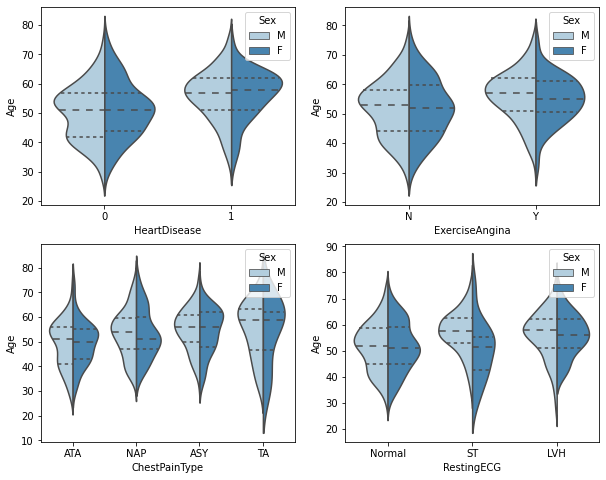

In [52]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.violinplot(data['HeartDisease'],data['Age'],palette='Blues',hue=data['Sex'],split=True,inner='quartile')
plt.subplot(2,2,2)
sns.violinplot(data['ExerciseAngina'],data['Age'],palette='Blues',hue=data['Sex'],split=True,inner='quartile')
plt.subplot(2,2,3)
sns.violinplot(data['ChestPainType'],data['Age'],palette='Blues',hue=data['Sex'],split=True,inner='quartile')
plt.subplot(2,2,4)
sns.violinplot(data['RestingECG'],data['Age'],palette='Blues',hue=data['Sex'],split=True,inner='quartile')

<AxesSubplot:>

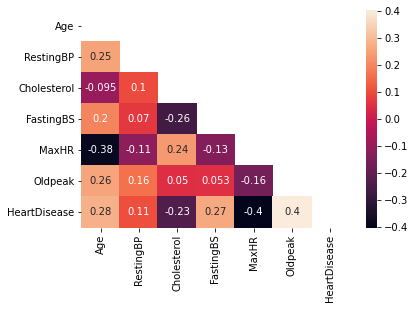

In [46]:
mask=np.zeros_like(data.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(data.corr(),annot=True,mask=mask)

<AxesSubplot:xlabel='HeartDisease', ylabel='Oldpeak'>

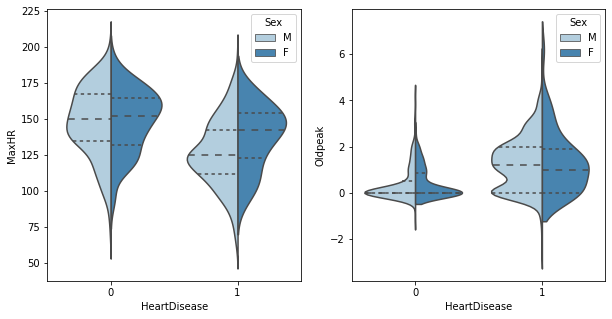

In [49]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.violinplot(data['HeartDisease'],data['MaxHR'],palette='Blues',hue=data['Sex'],split=True,inner='quartile')
plt.subplot(1,2,2)
sns.violinplot(data['HeartDisease'],data['Oldpeak'],palette='Blues',hue=data['Sex'],split=True,inner='quartile')

<AxesSubplot:xlabel='RestingECG', ylabel='Age'>

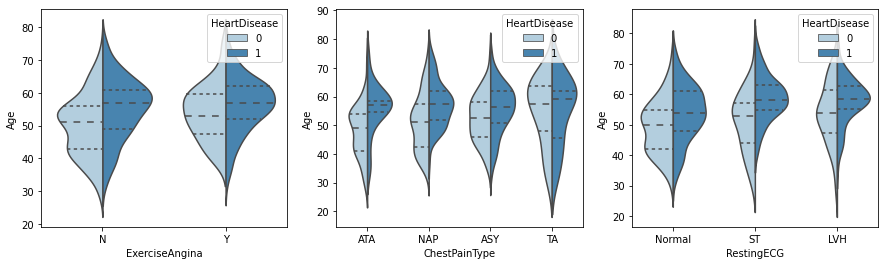

In [58]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.violinplot(data['ExerciseAngina'],data['Age'],palette='Blues',hue=data['HeartDisease'],split=True,inner='quartile')
plt.subplot(1,3,2)
sns.violinplot(data['ChestPainType'],data['Age'],palette='Blues',hue=data['HeartDisease'],split=True,inner='quartile')
plt.subplot(1,3,3)
sns.violinplot(data['RestingECG'],data['Age'],palette='Blues',hue=data['HeartDisease'],split=True,inner='quartile')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

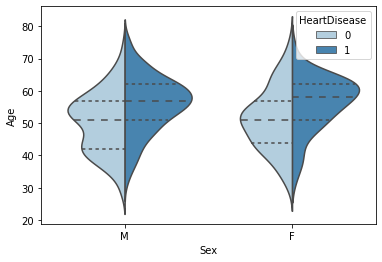

In [59]:
sns.violinplot(data['Sex'],data['Age'],palette='Blues',hue=data['HeartDisease'],split=True,inner='quartile')